# PANDAS SALES ANALYSIS - SUPERSTORE DATA

## OBJECTIVE

### To answer questions through our data analysis using Python Pandas and Python Matplotlib library

- What is the overall sales trend?
- Which are the top 10 products by sales?
- Which are the most selling products?
- Which is the most preferred Ship Mode?
- Which are the most profitable Product Category and Sub-Category?

----

<h3> IMPORTING REQUIRED LIBRARIES

In [3]:
# Data Manipulation
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

<h3> IMPORTING THE DATASET

In [5]:
df = pd.read_excel('superstore_sales.xlsx')

<h3> DATA AUDITING

In [8]:
# Check what the dataset looks like by viewing the first few rows of the Superstore data
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [9]:
# Check the last few rows of the Superstore data
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [10]:
# Check the shape the data
df.shape

(51290, 21)

In [11]:
# Check all information by columns
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [12]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [13]:
# Checking missing values
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [14]:
# Getting descriptive statistics summary
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


---

<h3> EXPLORATORY DATA ANALYSIS

<h4> QUESTION 1: WHAT ARE THE OVERALL SALES TREND?

In [15]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [16]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [55]:
df['month_year'] = df['order_date'].map(lambda x: x.strftime('%Y-%m'))

In [56]:
df_sales_trend = df.groupby('month_year')['sales'].sum()

In [57]:
df_trend_index = df_sales_trend.reset_index()

In [58]:
df_trend_index.head()

,month_year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610


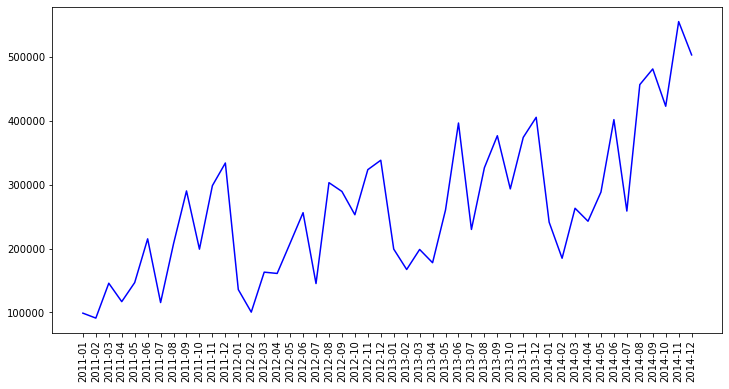

In [68]:
plt.figure(figsize=(12,6))
plt.plot(df_trend_index['month_year'], df_trend_index['sales'], color='b')
plt.xticks(rotation=90)
plt.show()

<h4> QUESTION 2: WHAT ARE THE TOP 10 PRODUCTS BY SALES?

In [71]:
df_product = df.groupby('product_name')['sales'].sum().reset_index()

In [72]:
df_product.head()

,product_name,sales
0,"""While you Were Out"" Message Book, One Form pe...",25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300
2,#10 Self-Seal White Envelopes,108.682
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672


In [77]:
# Sort sales column in descending order 
df_product_sorted = df_product.sort_values('sales', ascending = False)

# Top 10 products with highest sales
df_product_sorted.head(10)

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


<h4> QUESTION 3: WHAT ARE THE MOST SELLING PRODUCTS?

In [78]:
# Group by column and aggregate data
df_sell = df.groupby('product_name')['quantity'].sum().reset_index()
df_sell.head()

,product_name,quantity
0,"""While you Were Out"" Message Book, One Form pe...",8
1,"#10 Gummed Flap White Envelopes, 100/Box",11
2,#10 Self-Seal White Envelopes,10
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",32
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37


In [80]:
# Sort by quantity column
df_sell = df_sell.sort_values('quantity', ascending = False)
df_sell.head()

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
